In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = [12, 6]

In [2]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

<font size = 4> **DATA CLEANING** </font>

In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df2 = df1.drop(['area_type', 'society', 'balcony', 'availability'], axis = 'columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
# df2['bath'] = df2['bath'].fillna(df2['bath'].mean()) # Fill null values with mean
# df2['bath'] = df2['bath'].fillna(df2['bath'].median()) # Fill null values with median
# df2.fillna(df2.median(numeric_only=True), inplace=True) # Fill all numeric columns with their respective median
df3 = df2.dropna().copy()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df3.shape

(13246, 5)

In [9]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0])) # Splits the string using space and takes the first token

In [11]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [12]:
df3 = df3.drop(['size'], axis = 'columns')
df3.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [13]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [14]:
df3[df3['bhk'] > 20]

,location,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


In [15]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
df3['total_sqft'].apply(is_float).value_counts()

total_sqft
True     13056
False      190
Name: count, dtype: int64

In [18]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [19]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None # Invalid numbers(e.g., 34.46Sq. Meter returns None)

In [20]:
print(convert_sqft_to_num('2100 - 2850'))
print(convert_sqft_to_num('34.46Sq. Meter'))

2475.0
None


In [21]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4 = df4[df4['total_sqft'].notnull()]
df4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [22]:
df4.loc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

<font size = 4> **Feature Engineering** </font>

In [23]:
df5 = df4.copy()
df5['price_per_sqft'] = (df5['price']*100000 / df5['total_sqft']).round(2)
df5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.89
4,Kothanur,1200.0,2.0,51.00,2,4250.00


In [24]:
df5['location'].value_counts()

location
Whitefield                   532
Sarjapur  Road               392
Electronic City              302
Kanakpura Road               264
Thanisandra                  232
                            ... 
Indiranagar HAL 2nd Stage      1
Maruthi HBCS Layout            1
K R C kothanur                 1
1Channasandra                  1
Abshot Layout                  1
Name: count, Length: 1298, dtype: int64

In [25]:
len(df5['location'].unique())

1298

In [26]:
df5['location'] = df5['location'].apply(lambda x: x.strip())
location_stats = df5['location'].value_counts()
other_locations = location_stats[location_stats <= 10]
print(other_locations.count())

1047


In [27]:
print(other_locations.value_counts())

count
1     471
2     170
3     131
4      75
5      56
7      38
6      37
8      35
9      20
10     14
Name: count, dtype: int64


In [28]:
other_locations

location
BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: count, Length: 1047, dtype: int64

In [29]:
def replace_with_other(location):
    if location in other_locations:
        return 'other'
    else:
        return location
df5['location'] = df5['location'].apply(replace_with_other)
df5['location'].value_counts()

location
other              2872
Whitefield          533
Sarjapur  Road      392
Electronic City     304
Kanakpura Road      264
                   ... 
Doddaballapur        11
Tindlu               11
Marsur               11
HAL 2nd Stage        11
Kodigehalli          11
Name: count, Length: 241, dtype: int64

In [30]:
len(df5['location'].unique())

241

<font size = 4> **Outlier Removal** </font>

In [31]:
df5.head(10)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.89
4,Kothanur,1200.0,2.0,51.00,2,4250.00
5,Whitefield,1170.0,2.0,38.00,2,3247.86
6,Old Airport Road,2732.0,4.0,204.00,4,7467.06
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.82
8,Marathahalli,1310.0,3.0,63.25,3,4828.24
9,other,1020.0,6.0,370.00,6,36274.51


In [32]:
df5.shape

(13200, 6)

**<div align = 'justify'> As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft </div>**

In [33]:
outliers = df5[(df5['total_sqft'] / df5['bhk'] < 300) | (df5['total_sqft'] / df5['bhk'] > 2000)]
outliers

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.51
45,HSR Layout,600.0,9.0,200.0,8,33333.33
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.98
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.30
70,other,500.0,3.0,100.0,3,20000.00
...,...,...,...,...,...,...
13277,other,1400.0,7.0,218.0,7,15571.43
13279,other,1200.0,5.0,130.0,6,10833.33
13281,Margondanahalli,1375.0,5.0,125.0,5,9090.91
13303,Vidyaranyapura,774.0,5.0,70.0,5,9043.93


In [34]:
df6 = df5[((df5['total_sqft'] / df5['bhk']) >= 300) & ((df5['total_sqft'] / df5['bhk']) <= 2000)]
df6.shape

(12420, 6)

In [35]:
df6['price_per_sqft'].describe()

count     12420.000000
mean       6301.694080
std        4142.521759
min         500.000000
25%        4210.530000
50%        5294.120000
75%        6910.867500
max      176470.590000
Name: price_per_sqft, dtype: float64

In [36]:
def remove_pps_outliers(df):
    df_new = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        print(subdf.head())
        m = np.mean(subdf['price_per_sqft'])
        st = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf['price_per_sqft'] > (m - st)) & (subdf['price_per_sqft'] < (m + st))]
        df_new = pd.concat([df_new, reduced_df], ignore_index = True)
    return df_new
df7 = remove_pps_outliers(df6)

                 location  total_sqft  bath  price  bhk  price_per_sqft
210   1st Block Jayanagar      2850.0   4.0  428.0    4        15017.54
848   1st Block Jayanagar      1630.0   3.0  194.0    3        11901.84
2152  1st Block Jayanagar      1875.0   2.0  235.0    3        12533.33
2355  1st Block Jayanagar      2400.0   4.0  450.0    4        18750.00
4991  1st Block Jayanagar      1000.0   3.0   60.0    2         6000.00
                location  total_sqft  bath  price  bhk  price_per_sqft
936   1st Phase JP Nagar      2825.0   4.0  250.0    4         8849.56
2106  1st Phase JP Nagar      1875.0   3.0  167.0    3         8906.67
2292  1st Phase JP Nagar      1500.0   5.0   85.0    5         5666.67
2914  1st Phase JP Nagar      2065.0   4.0  210.0    3        10169.49
3481  1st Phase JP Nagar      2024.0   3.0  157.0    3         7756.92
                       location  total_sqft  bath  price  bhk  price_per_sqft
1368  2nd Phase Judicial Layout      1450.0   2.0  50.75    3   

In [37]:
df7.shape

(10212, 6)

In [38]:
df7['price_per_sqft'].describe()

count    10212.000000
mean      5656.296673
std       2262.605716
min       1250.000000
25%       4244.865000
50%       5175.180000
75%       6424.410000
max      24509.800000
Name: price_per_sqft, dtype: float64

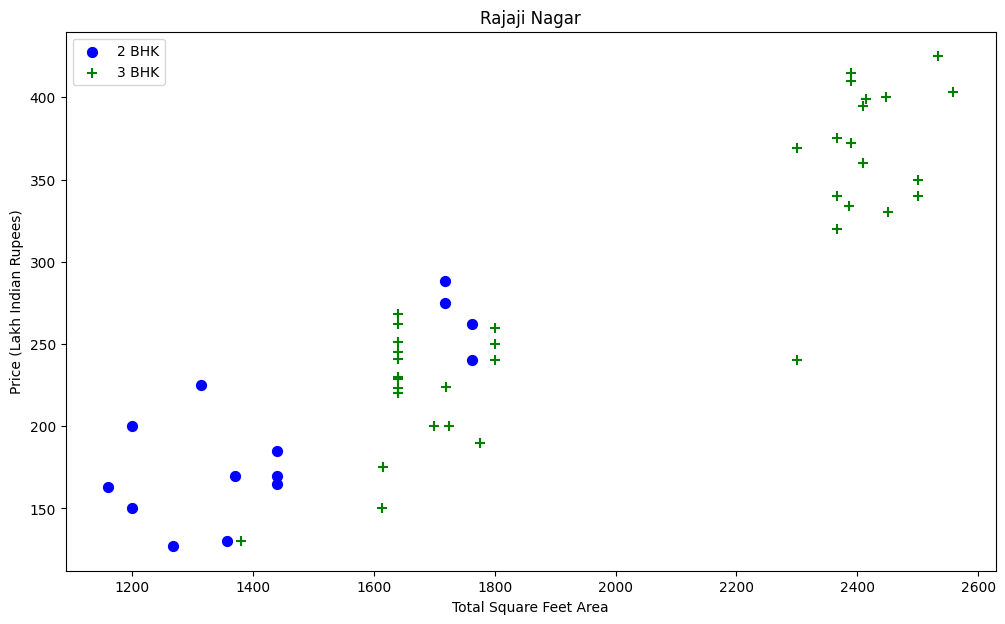

In [39]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    plt.figure(figsize = (12, 7))
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = '+', color = 'green', label = '3 BHK', s = 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    plt.show()
    
plot_scatter_chart(df7, "Rajaji Nagar")

In [40]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < stats['mean']].index.values)
    return df.drop(exclude_indices, axis = 'index')
df8 = remove_bhk_outliers(df7)
df8.shape

(7273, 6)

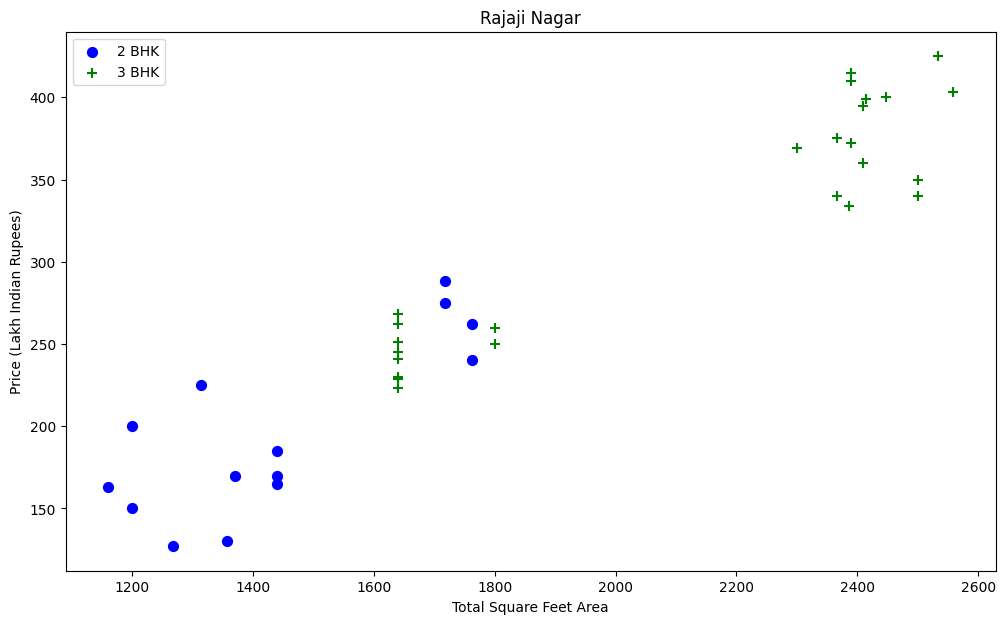

In [41]:
plot_scatter_chart(df8, "Rajaji Nagar")

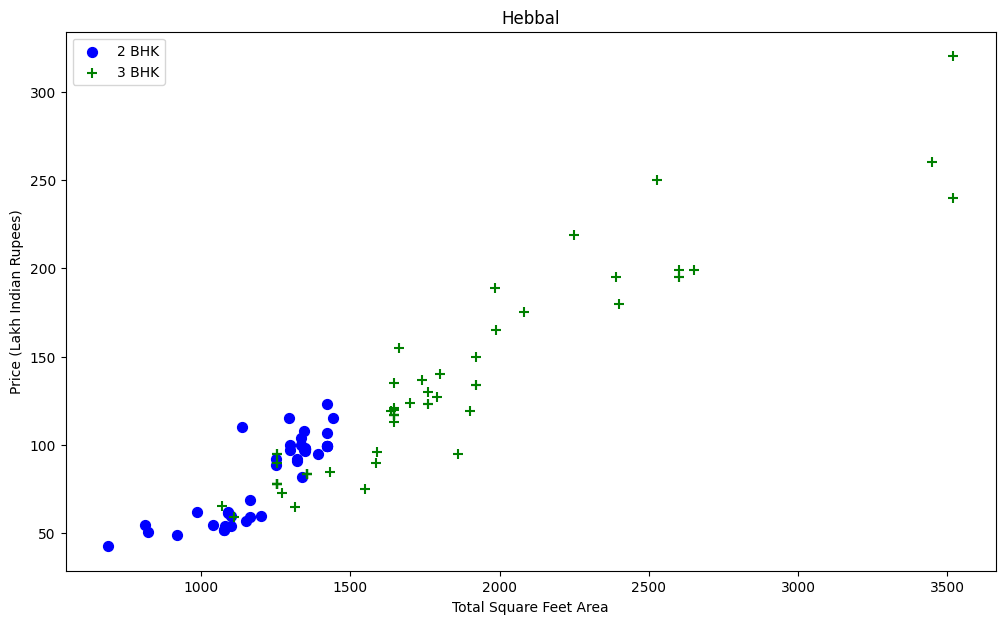

In [42]:
plot_scatter_chart(df7, "Hebbal")

Text(0, 0.5, 'Count')

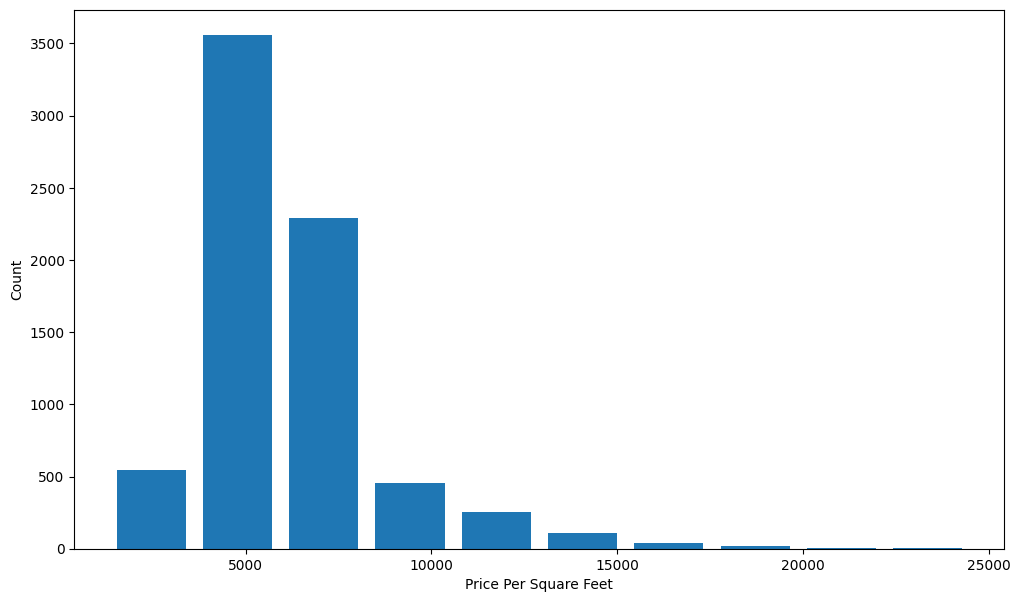

In [43]:
import matplotlib
plt.figure(figsize = (12, 7))
plt.hist(df8.price_per_sqft, rwidth = 0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [44]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [45]:
df8[df8.bath > 10]

,location,total_sqft,bath,price,bhk,price_per_sqft
5262,Neeladri Nagar,4000.0,12.0,160.0,10,4000.00
8460,other,12000.0,12.0,525.0,10,4375.00
8549,other,10000.0,16.0,550.0,16,5500.00
9281,other,6000.0,12.0,150.0,11,2500.00
9612,other,5425.0,13.0,275.0,13,5069.12


Text(0, 0.5, 'Count')

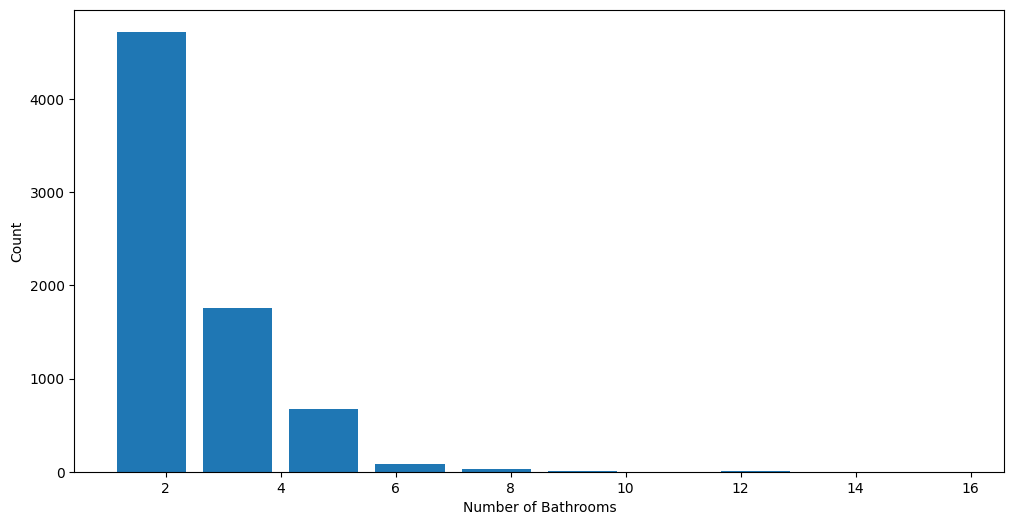

In [46]:
plt.hist(df8.bath, rwidth = 0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [47]:
df8[df8.bath >= df8.bhk + 2]

,location,total_sqft,bath,price,bhk,price_per_sqft
36,2nd Stage Nagarbhavi,3000.0,8.0,451.0,6,15033.33
37,2nd Stage Nagarbhavi,2400.0,8.0,450.0,6,18750.00
530,Arekere,2710.0,6.0,142.0,4,5239.85
580,BTM 2nd Stage,1260.0,5.0,185.0,3,14682.54
812,Bannerghatta,3012.0,6.0,250.0,4,8300.13
...,...,...,...,...,...,...
9887,other,6652.0,6.0,510.0,4,7666.87
10007,other,600.0,4.0,70.0,2,11666.67
10062,other,5656.0,5.0,499.0,3,8822.49
10173,other,6652.0,6.0,660.0,4,9921.83


In [48]:
df9 = df8[df8.bath < df8.bhk + 2]
df9.shape

(7195, 6)

In [49]:
df10 = df9.drop(['price_per_sqft'], axis = 'columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [50]:
df10.to_csv("Cleaned_Data.csv")

<font size = 4> **One Hot Encoding** </font>

In [51]:
dummies = pd.get_dummies(df10.location)
dummies.head(10)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [52]:
df11 = pd.concat([df10, dummies.drop('other', axis = 'columns')], axis = 'columns') # dummy varialbe trap
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
df12 = df11.drop('location', axis = 'columns')
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
df12.shape

(7195, 244)

<font size = 4> **Model Building** </font>

In [55]:
X = df12.drop('price', axis = 'columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [58]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8485272437753882

<font size = 4> **K Fold Cross Validation For Accuracy Measurement** </font>

In [59]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 42)
cross_val_score(LinearRegression(), X, y, cv = cv)

array([0.84852724, 0.86409199, 0.85183035, 0.87344778, 0.88346074])

In [60]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores = cross_val_score(LinearRegression(), X, y, cv=kf)
print("Scores for each fold:", scores)
print("Average score:", np.mean(scores))

Scores for each fold: [0.84852724 0.80641035 0.85683511 0.86260584 0.84615361]
Average score: 0.8441064323254815


<font size = 4> **Finding Best Model Using GridSearchCV** </font>

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {}
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score = False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X, y)

,model,best_score,best_params
0,linear_regression,0.841028,{}
1,lasso,0.723572,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.723296,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [62]:
def predict_price(location, sqft, bath, bhk):    
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [63]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

C:\Users\priya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


91.96149346406446

In [64]:
predict_price('1st Phase JP Nagar', 1000, 3, 3)

C:\Users\priya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.40563399809672

In [65]:
predict_price('Indira Nagar', 1000, 2, 2)

C:\Users\priya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


156.91885522495062

In [66]:
predict_price('Indira Nagar', 1000, 3, 3)

C:\Users\priya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


152.3629957589829

<font size = 4> **Exporting Model To Pickle File** </font>

In [67]:
import pickle
with open('bangalore_house_prices_model.pickle', 'wb') as f:
    pickle.dump(model, f)

In [68]:
import json
columns = {
    'data columns': [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))